# Part I - (Dataset Exploration Title)
## by (Oriji Sandra Onyinyechi)

## Introduction
> Introduce the dataset

The data consists of flight arrival and departure details for all commercial flights within the USA in the year 2008. It consist of `2389217` rows and `29` columns.

Source: **Harvard Dataverse**.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
pd.set_option('display.max_columns', 100)


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# fumction to load a csv file
def load_data(data):
    data = pd.read_csv(data)
    return data

In [3]:
data = load_data('2008.csv')

# make a copy of the data
airline = data.copy()

In [4]:
airline = data.copy()
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(2389217, 29)

In [6]:
airline.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               2389217 non-null  int64  
 1   Month              2389217 non-null  int64  
 2   DayofMonth         2389217 non-null  int64  
 3   DayOfWeek          2389217 non-null  int64  
 4   DepTime            2324775 non-null  float64
 5   CRSDepTime         2389217 non-null  int64  
 6   ArrTime            2319121 non-null  float64
 7   CRSArrTime         2389217 non-null  int64  
 8   UniqueCarrier      2389217 non-null  object 
 9   FlightNum          2389217 non-null  int64  
 10  TailNum            2346765 non-null  object 
 11  ActualElapsedTime  2319121 non-null  float64
 12  CRSElapsedTime     2388810 non-null  float64
 13  AirTime            2319121 non-null  float64
 14  ArrDelay           2319121 non-null  float64
 15  DepDelay           2324775 non-n

## Drop Missing Data

I will be dropping the missing data using the index, meaning that i will drop all rows with missing data in a column then drop the columns afterwards.

In [7]:
# get the index value of all missing rows
delay = airline[pd.notnull(airline['CarrierDelay'])]

In [8]:
# drop the index of missing values
airline.drop(delay.index, axis = 0, inplace = True)

In [9]:
airline.Diverted.value_counts()

0    1798980
1       5654
Name: Diverted, dtype: int64

In [10]:
# get the index value of all missing row
weather = airline[pd.notnull(airline['WeatherDelay'])]

In [11]:
# drop the index of missing values
airline.drop(weather.index, axis = 0, inplace = True)

In [12]:
airline.Diverted.value_counts()

0    1798980
1       5654
Name: Diverted, dtype: int64

In [13]:
airline.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804634 entries, 1 to 2389216
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1804634 non-null  int64  
 1   Month              1804634 non-null  int64  
 2   DayofMonth         1804634 non-null  int64  
 3   DayOfWeek          1804634 non-null  int64  
 4   DepTime            1740192 non-null  float64
 5   CRSDepTime         1804634 non-null  int64  
 6   ArrTime            1734538 non-null  float64
 7   CRSArrTime         1804634 non-null  int64  
 8   UniqueCarrier      1804634 non-null  object 
 9   FlightNum          1804634 non-null  int64  
 10  TailNum            1762183 non-null  object 
 11  ActualElapsedTime  1734538 non-null  float64
 12  CRSElapsedTime     1804227 non-null  float64
 13  AirTime            1734538 non-null  float64
 14  ArrDelay           1734538 non-null  float64
 15  DepDelay           1740192 non-n

In [14]:
# drop columns i have dropped the missing values row-wise
drop_col = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [15]:
#drop columns
airline.drop(drop_col, axis=1, inplace = True)

In [16]:
airline.CancellationCode.value_counts()

A    26075
B    25744
C    12617
D        6
Name: CancellationCode, dtype: int64

## Dropping Missing data Explained

There are `16` columns **(CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, ArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut)** with missing data, but i dropped only `6` columns. This is because **the values with missing data i dropped is not no value in  my analysis while they rest columns i didn't drop is of value in my analysis and has less missing data**. Also, if i drop them it **will disrupt my analysis and i will loose important features**. For eg, **Diverted columns** has only `two distinct values` with no missing data data. If i had dropped the columns with less missing data, i will loose one of the distinct values in **Diverted** column.

In [17]:
airline.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42451
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     1740192
Diverted                   0
dtype: int64

In [18]:
# shape of the data
airline.shape

(1804634, 24)

In [19]:
# show all columns
airline.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

### What is the structure of your dataset?

> Before cleaning my data i had **2389217 rows** and **29 columns** while after cleaning i have **42449 rows** and **15 columns**.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of my data include `'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'CRSElapsedTime', 'Origin', 'Dest','Distance', 'CancellationCode', 'Diverted'`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will support my investigation `'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier','Dest', 'TaxiIn', 'TaxiOut', 'CancellationCode', and  'Diverted'`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### Questions

The data contains 20 unique carriers that was used in the airline in the each 2008. How many goods does each carrier dispatched in 2008? Also i will like to know, how many were diverted or not?

In [20]:
# get the nunique value of UniqueCarrier
airline.UniqueCarrier.nunique()

20

In [21]:
# i want calculate the total time taken for a carrier to reach it distination
airline['Time Taken'] = airline['ArrTime'] - airline['DepTime']
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Time Taken
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,122.0
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,127.0
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,300.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,N483WN,121.0,125.0,101.0,0.0,4.0,HOU,MCO,848,13.0,7.0,0,NaN,0,301.0
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,N493WN,120.0,125.0,107.0,3.0,8.0,HOU,MCO,848,6.0,7.0,0,NaN,0,300.0


In [22]:
# get the index value of uniquecarrier
carrier_index = data.UniqueCarrier.value_counts().index

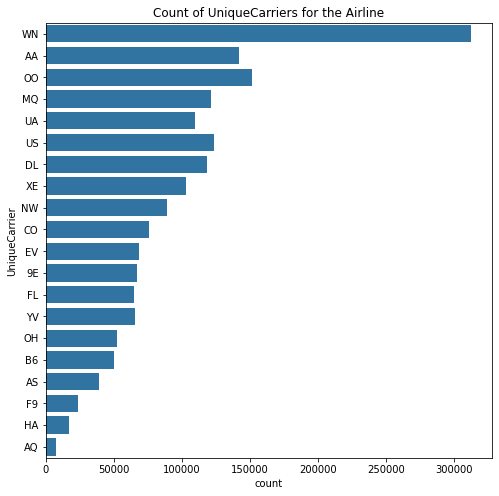

In [23]:
# Resize figure
plt.figure(figsize = [8, 8]);

# assign the same color palette to all the values
color = sb.color_palette()[0]

# plotted a barchart to show the count values of Carriers used by the Airline
sb.countplot(data = airline, y = 'UniqueCarrier', color = color, order = carrier_index);
plt.title('Count of UniqueCarriers for the Airline');

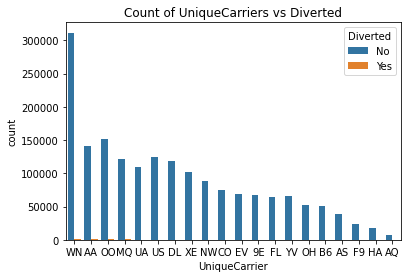

In [24]:
# check the how many goods were diverted for each Carrier
sb.countplot(data = airline, x = 'UniqueCarrier', hue= 'Diverted', order = carrier_index);

# add legend and legend title
plt.legend(['No', 'Yes'], title='Diverted')
plt.title('Count of UniqueCarriers vs Diverted');

In [25]:
airline.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Time Taken
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,122.0
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,127.0


In [26]:
airline.CancellationCode.value_counts()

A    26075
B    25744
C    12617
D        6
Name: CancellationCode, dtype: int64

In [27]:
# replace NaN value in CancellationCode with np.nan
airline['CancellationCode'] = airline['CancellationCode'].replace([np.nan],'Not Cancelled')
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Time Taken
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,Not Cancelled,0,122.0
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,Not Cancelled,0,127.0
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,Not Cancelled,0,300.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,N483WN,121.0,125.0,101.0,0.0,4.0,HOU,MCO,848,13.0,7.0,0,Not Cancelled,0,301.0
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,N493WN,120.0,125.0,107.0,3.0,8.0,HOU,MCO,848,6.0,7.0,0,Not Cancelled,0,300.0


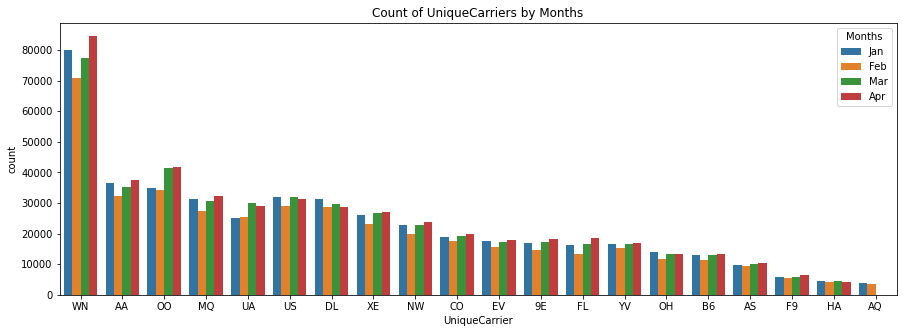

In [28]:
plt.figure(figsize = [15, 5]);

# check the how many goods were diverted for each Carrier
sb.countplot(data = airline, x = 'UniqueCarrier', hue= 'Month', order = carrier_index);


# add legend and legend title
plt.legend(['Jan', 'Feb', 'Mar', 'Apr'],loc='upper right', title ='Months')
plt.title('Count of UniqueCarriers by Months');

In [29]:
reason_index = airline['CancellationCode'].value_counts().index

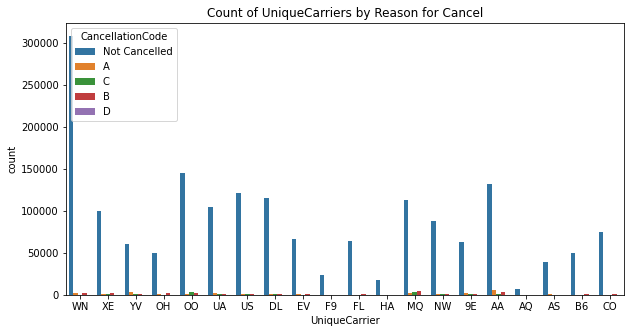

In [30]:
plt.figure(figsize = [10, 5]);

# check the how many goods were diverted for each Carrier
sb.countplot(data = airline, x = 'UniqueCarrier', hue = 'CancellationCode');

# add legend and legend title
plt.title('Count of UniqueCarriers by Reason for Cancel');

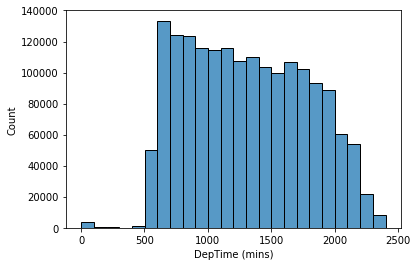

In [31]:
bins = np.arange(airline['DepTime'].min(), airline['DepTime'].max()+100, 100)
sb.histplot(data = airline, x = 'DepTime', bins = bins)
plt.xlabel('DepTime (mins)');

In [32]:
time = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime']
data_time = airline[time].corr()
data_time

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime
DepTime,1.000000,0.992906,0.791300,0.786270,-0.020935,-0.010409,-0.017162
CRSDepTime,0.992906,1.000000,0.786211,0.784565,-0.020033,-0.011866,-0.016666
ArrTime,0.791300,0.786211,1.000000,0.965840,0.040855,0.049005,0.040660
CRSArrTime,0.786270,0.784565,0.965840,1.000000,0.039394,0.049018,0.039969
ActualElapsedTime,-0.020935,-0.020033,0.040855,0.039394,1.000000,0.990644,0.993103
CRSElapsedTime,-0.010409,-0.011866,0.049005,0.049018,0.990644,1.000000,0.990299
AirTime,-0.017162,-0.016666,0.040660,0.039969,0.993103,0.990299,1.000000


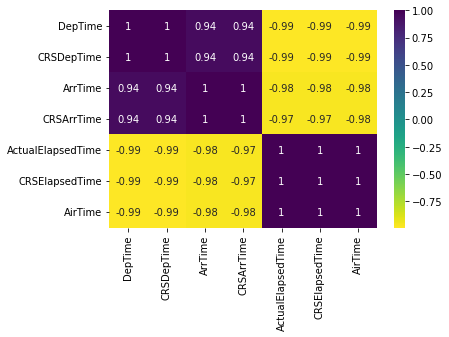

In [33]:
# check the correlation of the time columns
sb.heatmap(data_time.corr(), cmap="viridis_r", annot=True);

### My Findings
These are my findings:
* `DepTime (Depature Time)` is positively correlated to `CRSDepTime (Scheduled Arrival)` with a value of `1` which indicates strong correlation.
* `ArrTime(Arrival Time)` is positive correlated to `CRSDepTime (Scheduled Arrival)` with a value of `1` which shows a strong correlation. An increase in Arrival Time will also lead to an increase in Depature Time. Same with `ActualElapsedTime` with is positively correlated to `CRSElapsedTime` with a value of `1`.
* We features like `ActualElapsedTime` is negatively correlated with `DepTime` with a vlaue of `-0.99`.

In [34]:
# correlation of taxiIn and TaxiOut

taxi = ['TaxiIn', 'TaxiOut']
taxii = airline[taxi].corr()
taxii

,TaxiIn,TaxiOut
TaxiIn,1.000000,0.022081
TaxiOut,0.022081,1.000000


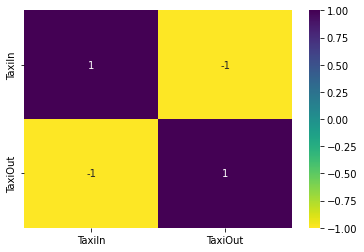

In [35]:
# I want to check if the time the Taxi came and the time it came out are correlated
sb.heatmap(taxii.corr(), cmap="viridis_r", annot=True);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In Univariate Exploration Visualization, I explored UniqueCarrier and Diverted columns. I was interested in to know out of the Unique carriers, how many of them were diverted. I also looked at the correlation of the time features, my finding can be found above.

> I did tranformation for `CancellationCode` columns. For `NaN` values, i replace it Not Cancelled. Also, i added another feature `Time Taken` which i got by substrating `ArrTime` from `DepTime`.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, from my plot it can be seen that that Airline carrier in 2008 has low values of good carriers that were diverted. For Example, UniqueCarrier `9E` has `88,359` with `287` carier that was diverted, `AQ` has `7800` values with `6` carier that was diverted.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

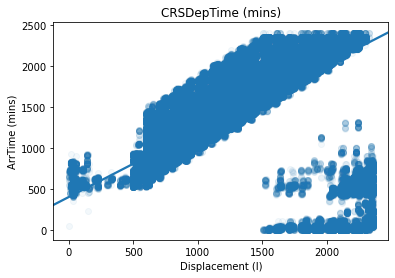

In [36]:

sb.regplot(data = airline, x = 'CRSDepTime', y = 'ArrTime', truncate=False, x_jitter=0.5, scatter_kws={'alpha':1/20});
# add label to xlabel
plt.xlabel("Displacement (l)")
# add label to ylabel
plt.ylabel('ArrTime (mins)')
# add title
plt.title('CRSDepTime (mins)');

The distribution is skewed to the right and like i said above have that the two features have a strong correlation of 1.

In [37]:
airline['UniqueCarrier'].value_counts().index

Index(['WN', 'OO', 'AA', 'US', 'MQ', 'DL', 'UA', 'XE', 'NW', 'CO', 'EV', '9E',
       'YV', 'FL', 'OH', 'B6', 'AS', 'F9', 'HA', 'AQ'],
      dtype='object')

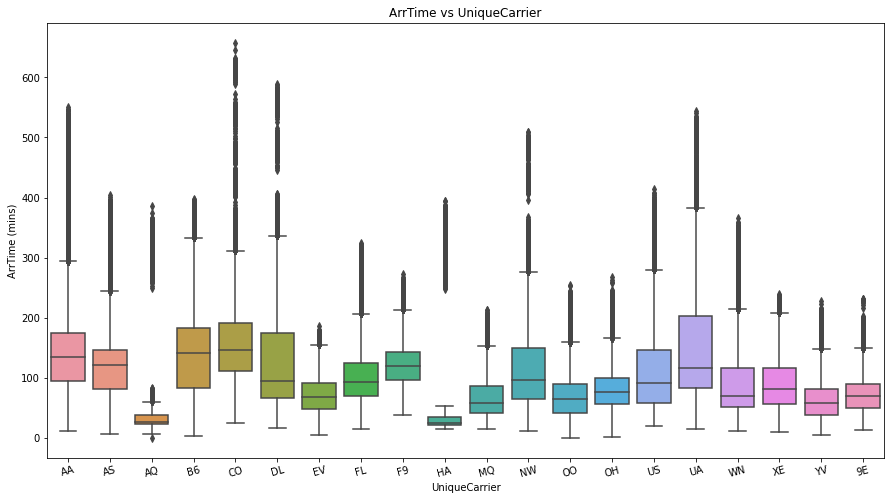

In [38]:
# arrange the unique carrier alphabetically
carrier = ['AA', 'AS', 'AQ', 'B6', 'CO', 'DL', 'EV', 'FL', 'F9', 'HA', 'MQ', 'NW', 'OO', 'OH', 'US', 'UA',
           'WN', 'XE', 'YV', '9E']


# add figsize to the chart
plt.figure(figsize = [15, 8]);

# plot uniquecarrier vs airtime
sb.boxplot(data=airline, x='UniqueCarrier', y='AirTime', order = carrier)
# add label to x
plt.xlabel("UniqueCarrier")
# add label to y
plt.ylabel('ArrTime (mins)')
# add title
plt.title('ArrTime vs UniqueCarrier')
# add xticks
plt.xticks(rotation=15);

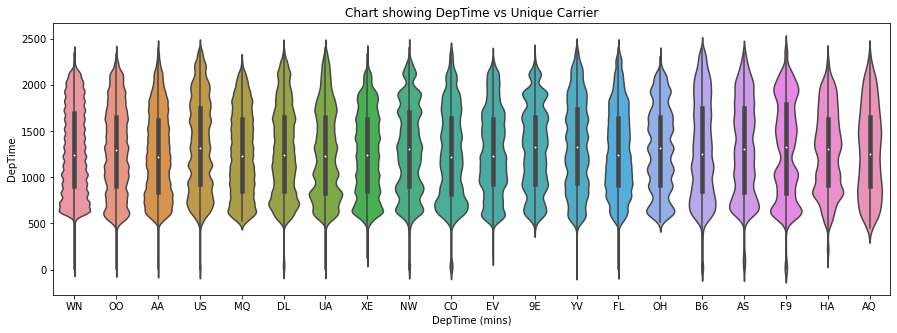

In [39]:
# The dtype of UniqueCarrier was obj, i want to change it to categorical and then plot it using boxplot
carrier = ['WN', 'OO', 'AA', 'US', 'MQ', 'DL', 'UA', 'XE', 'NW', 'CO', 'EV', '9E', 'YV', 'FL',
           'OH', 'B6', 'AS', 'F9', 'HA', 'AQ']

plt.figure(figsize = [15, 5]);

vcarrier = pd.api.types.CategoricalDtype(ordered=True, categories=carrier)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
airline['UniqueCarrier'] = airline['UniqueCarrier'].astype(vcarrier);

sb.violinplot(data=airline, x='UniqueCarrier', y='DepTime', oreder= carrier)
# add title
plt.title('Chart showing DepTime vs Unique Carrier')
# add label x
plt.xlabel('DepTime (mins)');

<Figure size 1080x1080 with 0 Axes>

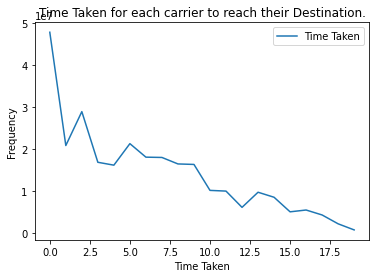

In [40]:
plt.figure(figsize = [15, 15]);

# i visualize the time taken for carrier to reach its destination
time = airline.groupby(['UniqueCarrier'])['Time Taken'].sum().reset_index()
time.plot.line()
# add label to x axis
plt.xlabel('Time Taken')
# add label to y label
plt.ylabel('Frequency')
# add title to chart
plt.title('Time Taken for each carrier to reach their Destination.');

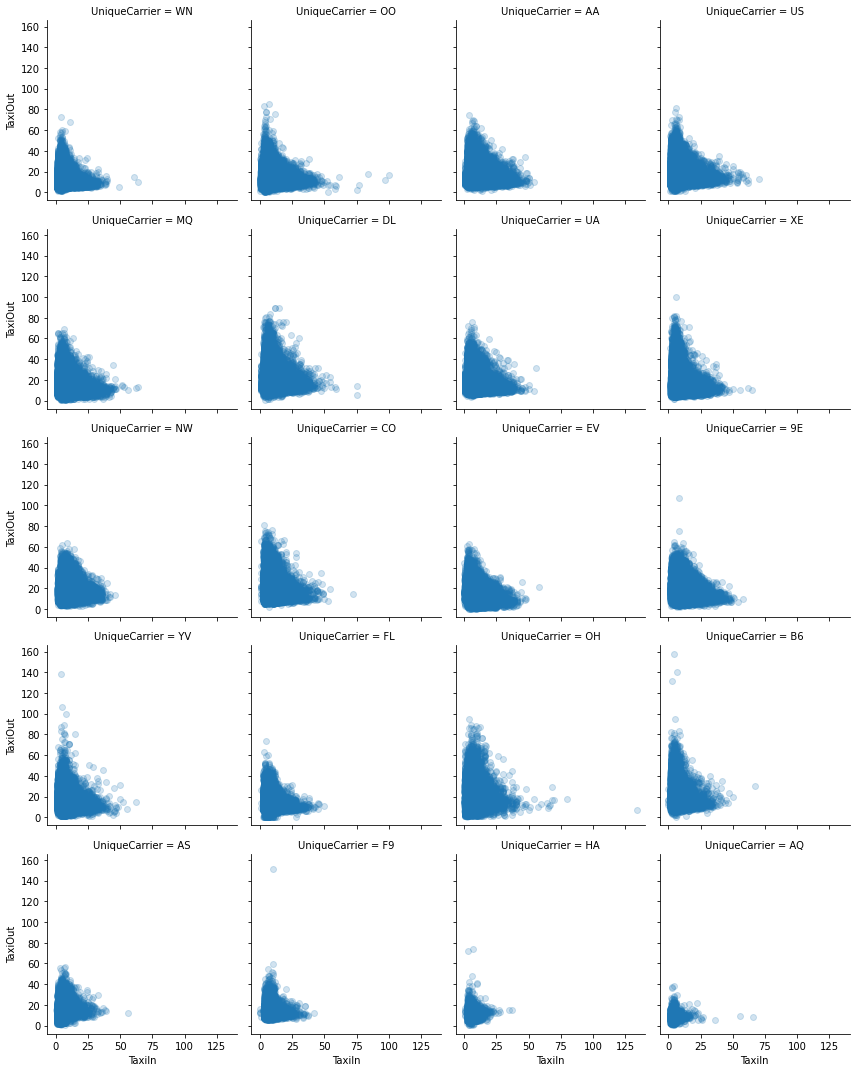

In [41]:
# list of uniquecarrier
carrier = ['WN', 'OO', 'AA', 'US', 'MQ', 'DL', 'UA', 'XE', 'NW', 'CO', 'EV', '9E', 'YV', 'FL',
           'OH', 'B6', 'AS', 'F9', 'HA', 'AQ']

# change dtype of uniquecarrier to categorical dtype
vcarrier = pd.api.types.CategoricalDtype(ordered=True, categories=carrier)
airline['UniqueCarrier'] = airline['UniqueCarrier'].astype(vcarrier)


g = sb.FacetGrid(data = airline, col = 'UniqueCarrier', col_wrap = 4)
g.map(plt.scatter, 'TaxiIn', 'TaxiOut',  alpha = 1/5);

In [42]:
time

,UniqueCarrier,Time Taken
0,WN,47854443.0
1,OO,20848530.0
2,AA,28926142.0
3,US,16853310.0
4,MQ,16167486.0
5,DL,21295835.0
6,UA,18075054.0
7,XE,18005584.0
8,NW,16458751.0
9,CO,16340449.0


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When i plotted `ArrTime vs UniqueCarrier` i notice many outliers in both features. Also, in the correlation plot i noticed a strong (positive) correlations between values like `DepTime (Depature Time) vs CRSDepTime (Scheduled Arrival)` etc. Negative correlation between `ActualElapsedTime vs DepTime` etc.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed outliers in some features and strong positive correlation among some features also negative correlation too.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

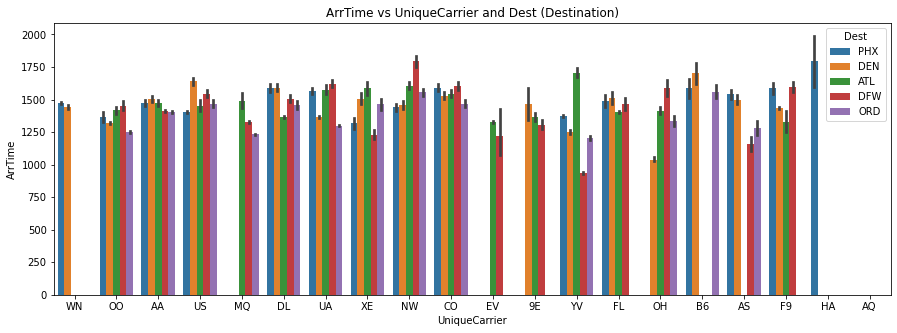

In [43]:
#add figsize in chart
plt.figure(figsize = [15, 5]);

# plot loc top 5 uniquecarrier
airline_sub = airline.loc[airline['Dest'].isin(['ATL','ORD', 'DFW','DEN', 'PHX'])]
sb.barplot(data = airline_sub, x = 'UniqueCarrier' , y = 'ArrTime', hue = 'Dest', order = carrier);

# add title to chart
plt.title("ArrTime vs UniqueCarrier and Dest (Destination)");

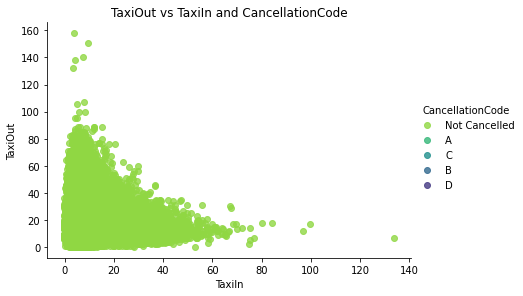

In [44]:
# plot TaxiOut vs TaxiIn and CancellationCode
g = sb.FacetGrid(data = airline, hue = 'CancellationCode',
                height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'TaxiIn', 'TaxiOut', x_jitter = 0.4, fit_reg = False)

# add legend chart
g.add_legend()

# add title to chart
plt.title('TaxiOut vs TaxiIn and CancellationCode');

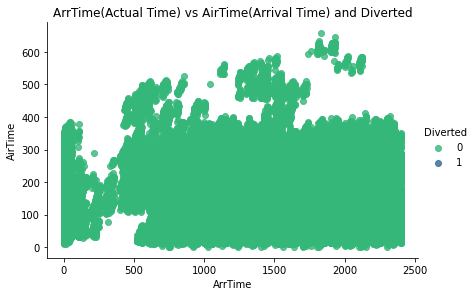

In [45]:
# plot TaxiOut vs TaxiIn and CancellationCode
g = sb.FacetGrid(data = airline, hue = 'Diverted',
                height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'ArrTime', 'AirTime', x_jitter = 0.4, fit_reg = False)

# add legend to chart
g.add_legend()

# add title to chart
plt.title('ArrTime(Actual Time) vs AirTime(Arrival Time) and Diverted');

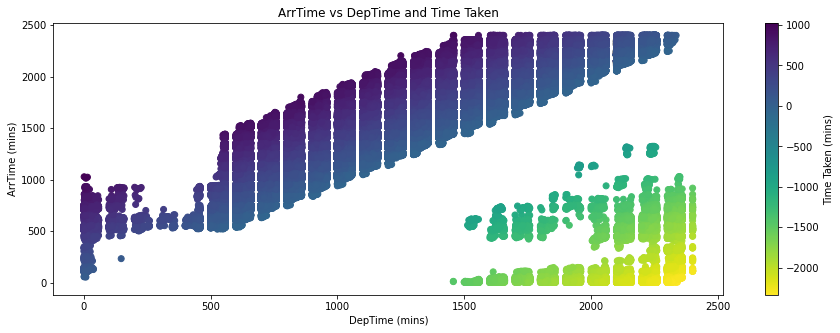

In [46]:
# add figsize to chart
plt.figure(figsize = [15, 5]);

# plot ArrivalTime(mins) vs DepartureTime (mins) and Time Taken(mins)
plt.scatter(data = airline, x = 'DepTime', y = 'ArrTime', c = 'Time Taken', cmap = 'viridis_r' )

# add colorbar
plt.colorbar(label = 'Time Taken (mins)')

# add label to x axis
plt.xlabel('DepTime (mins)')

# add label to y axis
plt.ylabel('ArrTime (mins)')

# add title to chart
plt.title('ArrTime vs DepTime and Time Taken');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here are my observations
* In Destination like `ATL`, `ORD`, `DFW`, `DEN`, `PHX`, there were some uniquecarrier that do head to these destination not even one.
* There are more carrier that was not cancelled than those cancelled.
* There are many carrier that was not diverted.

### Were there any interesting or surprising interactions between features?

> Yes, In the plot of `ArrTime vs DepTime` and Time Taken, i noticed that the time taken for some carrier to arrive it's destination in  minutes is higher.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
 * The Airline data for the 2008 contains 2389217 rows and 29 columns then after data cleaning we have 1804634 rows and 25 columns.
 * There were many missing values but i only dropped columns of some that won't be of benefit in my exploration.
 * There are strong postive relation between some freatures of the data eg 'ArrTime(Arrival Time) and CRSDepTime (Scheduled Arrival)' amongst others.
 * There were also negative correlation between featuers like `ActualElapsedTime and DepTime` amongst other.
 * The minimum time taken for carrier to arrive it's destination is `-2336.0` while the maximum is `1025.0`'


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

